In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [4]:
df = pd.read_csv("Portfolios_Formed_on_monthly.csv", index_col=0, parse_dates=True, na_values=-99.99)
df.tail()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53
201812,NaN,-14.28,-12.41,-9.76,-14.77,-12.44,-12.22,-11.34,-9.21,-15.31,-13.19,-11.94,-13.13,-12.73,-11.57,-11.87,-10.75,-9.54,-8.90


اینها همه انواع بازده برای پرتفوی های مختلف سهام ایالات متحده هستند که بر حسب سرمایه (به چندک) تقسیم می شوند.

به عنوان مثال:

L10 ==> (صدک اول )ده درصد شرکت های پایینی با کمترین ارزش در بازار بورس آمریکا

H10 ==> (صدک آخر)ده درصد شرکت های بالایی با بیشترین ارزش در بورس آمریکا

داده های این جدول به صورت ماهانه هستند

In [5]:
dff = df[["Lo 10", "Hi 10"]] / 100
dff.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


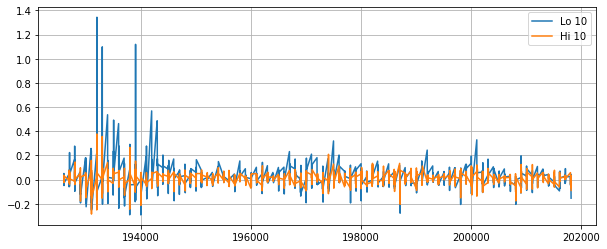

In [6]:
dff.plot(grid=True, figsize=(10,4))
plt.show()

In [7]:
vol = dff.std()
vol

Lo 10    0.106288
Hi 10    0.053900
dtype: float64

این نوسانات ماهانه است زیرا ما بازده ماهانه را در اختیار داریم. برای محاسبه نوسانات سالانه:

In [8]:
annualized_vol = vol * np.sqrt(12)
annualized_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [12]:
dff.shape[0]

1110

اکنون می خواهیم بازده ماهانه را محاسبه کنیم. ما به تعداد کل ماه های کل بازه زمانی (از 1926 تا 2018) نیاز داریم که به سادگی تعداد ردیف های فریم داده شده است. سپس می توانیم از فرمول بازده در ماه استفاده کنیم:

In [13]:
nmonths = dff.shape[0]
total_return = (1 + dff).prod() - 1
return_per_month = (1 + total_return)**(1/nmonths) - 1
return_per_month

Lo 10    0.012986
Hi 10    0.007423
dtype: float64

حال میتوانیم بازده سالانه را محاسبه کنیم. زیرا بازده ثابت ماهانه را در اختیار داریم.

In [14]:
annualized_return = (1 + return_per_month)**12 - 1
print( annualized_return ) 

# که البته
# return-per-year: total return  power 12/nomber of months  
# annualized_return = (1 + total_return) ** (12/nmonths) - 1


Lo 10    0.167463
Hi 10    0.092810
dtype: float64


**ROR and sharpe ratios**:

In [15]:
ROR = annualized_return / annualized_vol
ROR

Lo 10    0.454825
Hi 10    0.497063
dtype: float64

این نسبت پیشنهاد میدهد که در شرکت های صدک بالا سرمایه گذاری کنیم که بازده بیشتری نسبت به تحمل ریسک کسب میکنیم.

In [16]:
# نرخ بازده بدون ریسک
risk_free_rate = 0.03
excess_return  = annualized_return - risk_free_rate
sharpe_ratio   = excess_return / annualized_vol
sharpe_ratio

Lo 10    0.373346
Hi 10    0.336392
dtype: float64

اما زمانی که نرخ بدن ریسک را اعمال میکنیم مشاهده می شود که نسبت شارپ به ما پیشنهاد سرمایه گذاری در صدک پایینی را میدهد.

#### سوال:

فرض کنید که دارایی اول روزی 1 درصد نزول و دارایی دوم روزی یک درصد صعود میکند. نوسان کدام دارایی بیشتر است؟؟؟

پاسخ ساده است. هیچکدام!! زیرا نوسان هر دو دارایی صفر می باشد

In [17]:
# ساخت دو دارایی فرضی
a = [10]
b = [10]
for i in range(12):
    a.append( a[i] + (-0.01)*a[i] ) # return A loses 1% every month
    b.append( b[i] + (0.01)*b[i]  ) # return B gains 1% every month
df = pd.DataFrame({"A":a, "B":b})

# محاسبه بازده به صورت جداگانه
df["returns A"] = df["A"] / df["A"].shift(1) - 1
df["returns B"] = df["B"] / df["B"].shift(1) - 1
df

,A,B,returns A,returns B
0,10.000000,10.000000,NaN,NaN
1,9.900000,10.100000,-0.01,0.01
2,9.801000,10.201000,-0.01,0.01
3,9.702990,10.303010,-0.01,0.01
4,9.605960,10.406040,-0.01,0.01
5,9.509900,10.510101,-0.01,0.01
6,9.414801,10.615202,-0.01,0.01
7,9.320653,10.721354,-0.01,0.01
8,9.227447,10.828567,-0.01,0.01
9,9.135172,10.936853,-0.01,0.01


In [18]:
# مشاهده میکنیم که دارایی دوم سود بیشتری کسب میکند نسبت به مقدار نزول دارایی اول
total_returns = (1 + df[["returns A","returns B"]]).prod() - 1 
total_returns

returns A   -0.113615
returns B    0.126825
dtype: float64

In [19]:
# محاسبه ریسک و نوسان
volatility = df[["returns A","returns B"]].std()
volatility

returns A    7.422730e-17
returns B    0.000000e+00
dtype: float64

نوسان هر دو دارایی صفر می باشد همان طور که انتظار داشتیم.